Importing the necessary libraries

In [1]:

import numpy as np
import seaborn as sb
from matplotlib.pyplot import *
import json
import pandas as pd
from pandas import json_normalize
import requests
import folium
from sklearn.cluster import KMeans
import geocoder

In [2]:
#read csv file
df=pd.read_csv('food_coded.csv')
df.columns
df.head()
df.tail
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GPA                           123 non-null    object 
 1   Gender                        125 non-null    int64  
 2   breakfast                     125 non-null    int64  
 3   calories_chicken              125 non-null    int64  
 4   calories_day                  106 non-null    float64
 5   calories_scone                124 non-null    float64
 6   coffee                        125 non-null    int64  
 7   comfort_food                  124 non-null    object 
 8   comfort_food_reasons          124 non-null    object 
 9   comfort_food_reasons_coded    106 non-null    float64
 10  cook                          122 non-null    float64
 11  comfort_food_reasons_coded.1  125 non-null    int64  
 12  cuisine                       108 non-null    float64
 13  diet_

In [3]:
# columns with null values
missing_val=[i for i in df.columns if df[i].isnull().any()]
for i in missing_val:
    print(i,df[i].isnull().sum())

GPA 2
calories_day 19
calories_scone 1
comfort_food 1
comfort_food_reasons 1
comfort_food_reasons_coded 19
cook 3
cuisine 17
diet_current 1
drink 2
eating_changes 3
employment 9
exercise 13
father_education 1
father_profession 3
fav_cuisine 2
fav_food 2
food_childhood 1
healthy_meal 1
ideal_diet 1
income 1
life_rewarding 1
marital_status 1
meals_dinner_friend 3
mother_education 3
mother_profession 2
on_off_campus 1
persian_food 1
self_perception_weight 1
soup 1
sports 2
tortilla_calories 1
type_sports 21
weight 2


In [4]:
df.describe()


,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food_reasons_coded,cook,comfort_food_reasons_coded.1,cuisine,...,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,veggies_day,vitamins,waffle_calories
count,125.000000,125.000000,125.000000,106.000000,124.000000,125.00000,106.000000,122.000000,125.000000,108.000000,...,124.000000,124.000000,124.000000,123.000000,125.000000,124.000000,125.000000,125.000000,125.000000,125.000000
mean,1.392000,1.112000,577.320000,3.028302,505.241935,1.75200,2.698113,2.786885,2.688000,1.388889,...,2.806452,3.120968,1.217742,1.390244,3.336000,947.580645,555.040000,4.008000,1.512000,1073.400000
std,0.490161,0.316636,131.214156,0.639308,230.840506,0.43359,1.972042,1.038351,1.910987,0.974759,...,1.423824,1.115980,0.414385,0.489800,1.436528,202.090179,152.370379,1.081337,0.501867,248.667092
min,1.000000,1.000000,265.000000,2.000000,315.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,580.000000,345.000000,1.000000,1.000000,575.000000
25%,1.000000,1.000000,430.000000,3.000000,420.000000,2.00000,2.000000,2.000000,2.000000,1.000000,...,2.000000,2.000000,1.000000,1.000000,2.000000,725.000000,500.000000,3.000000,1.000000,900.000000
50%,1.000000,1.000000,610.000000,3.000000,420.000000,2.00000,2.000000,3.000000,2.000000,1.000000,...,3.000000,3.000000,1.000000,1.000000,3.000000,940.000000,500.000000,4.000000,2.000000,900.000000
75%,2.000000,1.000000,720.000000,3.000000,420.000000,2.00000,3.000000,3.000000,3.000000,1.000000,...,4.000000,4.000000,1.000000,2.000000,5.000000,1165.000000,690.000000,5.000000,2.000000,1315.000000
max,2.000000,2.000000,720.000000,4.000000,980.000000,2.00000,9.000000,5.000000,9.000000,6.000000,...,5.000000,6.000000,2.000000,2.000000,5.000000,1165.000000,850.000000,5.000000,2.000000,1315.000000


In [5]:
df.columns

Index(['GPA', 'Gender', 'breakfast', 'calories_chicken', 'calories_day',
       'calories_scone', 'coffee', 'comfort_food', 'comfort_food_reasons',
       'comfort_food_reasons_coded', 'cook', 'comfort_food_reasons_coded.1',
       'cuisine', 'diet_current', 'diet_current_coded', 'drink',
       'eating_changes', 'eating_changes_coded', 'eating_changes_coded1',
       'eating_out', 'employment', 'ethnic_food', 'exercise',
       'father_education', 'father_profession', 'fav_cuisine',
       'fav_cuisine_coded', 'fav_food', 'food_childhood', 'fries', 'fruit_day',
       'grade_level', 'greek_food', 'healthy_feeling', 'healthy_meal',
       'ideal_diet', 'ideal_diet_coded', 'income', 'indian_food',
       'italian_food', 'life_rewarding', 'marital_status',
       'meals_dinner_friend', 'mother_education', 'mother_profession',
       'nutritional_check', 'on_off_campus', 'parents_cook', 'pay_meal_out',
       'persian_food', 'self_perception_weight', 'soup', 'sports', 'thai_food',
       

In [6]:
# creating new dataframe which is relevant to a student needs
column=['cook','eating_out','employment','ethnic_food', 'exercise','fruit_day','income','on_off_campus','pay_meal_out','sports','veggies_day']
dfs=df[column]
dfs

,cook,eating_out,employment,ethnic_food,exercise,fruit_day,income,on_off_campus,pay_meal_out,sports,veggies_day
0,2.0,3,3.0,1,1.0,5,5.0,1.0,2,1.0,5
1,3.0,2,2.0,4,1.0,4,4.0,1.0,4,1.0,4
2,1.0,2,3.0,5,2.0,5,6.0,2.0,3,2.0,5
3,2.0,2,3.0,5,3.0,4,6.0,1.0,2,2.0,3
4,1.0,2,2.0,4,1.0,4,6.0,1.0,4,1.0,4
...,...,...,...,...,...,...,...,...,...,...,...
120,3.0,2,1.0,4,2.0,5,4.0,3.0,4,1.0,5
121,3.0,4,3.0,3,2.0,4,2.0,1.0,4,NaN,5
122,3.0,3,3.0,5,2.0,4,2.0,1.0,4,2.0,4
123,3.0,5,2.0,2,1.0,5,4.0,1.0,3,2.0,3


cook 3
employment 9
exercise 13
income 1
on_off_campus 1
sports 2


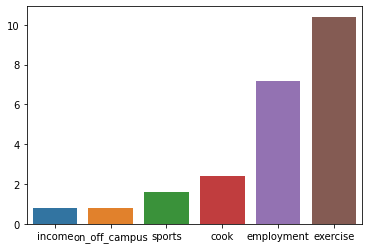

In [7]:
# finding missing values in the new dataframe
missing_values=[i for i in dfs.columns if dfs[i].isnull().any()]
for i in missing_values:
    print(i,dfs[i].isnull().sum())
def percent_null():
    p = 100 * dfs.isnull().sum() / len(df) # Percentage of null values in each columns
    p = p[p > 0].sort_values() # Ignore cases where percentage is 0 and then sort
    sb.barplot(x=p.index, y=p) # Plot the data
percent_null()

we can see that the columns contains too many null values so we will fill them up with the fiilna function

In [8]:
dfs.isnull().sum()

cook              3
eating_out        0
employment        9
ethnic_food       0
exercise         13
fruit_day         0
income            1
on_off_campus     1
pay_meal_out      0
sports            2
veggies_day       0
dtype: int64

In [9]:
dfs['cook'].value_counts()
dfs['cook'].fillna(1,inplace=True)
dfs['employment'].value_counts()
dfs['employment'].fillna(4,inplace=True)
dfs['exercise'].value_counts()
dfs['exercise'].fillna(5,inplace=True)
dfs['income'].value_counts()
dfs['income'].fillna(1,inplace=True)
dfs['on_off_campus'].value_counts()
dfs['on_off_campus'].fillna(1,inplace=True)
dfs['sports'].value_counts()
dfs['sports'].fillna(2,inplace=True)

c:\Users\91910\Anaconda\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [10]:
dfs.head()

,cook,eating_out,employment,ethnic_food,exercise,fruit_day,income,on_off_campus,pay_meal_out,sports,veggies_day
0,2.0,3,3.0,1,1.0,5,5.0,1.0,2,1.0,5
1,3.0,2,2.0,4,1.0,4,4.0,1.0,4,1.0,4
2,1.0,2,3.0,5,2.0,5,6.0,2.0,3,2.0,5
3,2.0,2,3.0,5,3.0,4,6.0,1.0,2,2.0,3
4,1.0,2,2.0,4,1.0,4,6.0,1.0,4,1.0,4


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'cook'),
  Text(1, 0, 'eating_out'),
  Text(2, 0, 'employment'),
  Text(3, 0, 'ethnic_food'),
  Text(4, 0, 'exercise'),
  Text(5, 0, 'fruit_day'),
  Text(6, 0, 'income'),
  Text(7, 0, 'on_off_campus'),
  Text(8, 0, 'pay_meal_out'),
  Text(9, 0, 'sports'),
  Text(10, 0, 'veggies_day')])

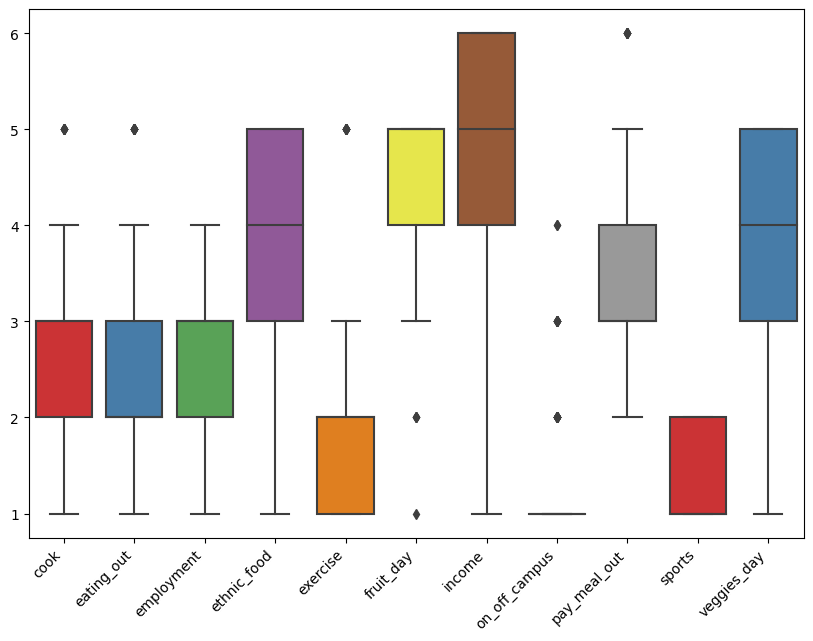

In [11]:

figure(figsize=(10,7),dpi=100)
sb.boxplot(data=dfs,palette="Set1")
xticks(rotation=45, ha='right')

In [12]:
search_query='Apartment'
CLIENT_ID = "O5AW1GNPGXRHBJ4LZJ0AAITMM0YLDQGYMRGEIRADSEAB43OD"
CLIENT_SECRET = "2MXMGZD5HTRRBKP4KF0PVSDEULCKD0NYIF2SFKDEJSU0MYEB"
VERSION = '20220526'
LIMIT = 50

In [13]:
url = 'https://api.foursquare.com/v3/places/search?&client_id={}&client_secret={}&v={}&query={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    search_query,
    13.133521,77.567135,
    30000, 
    LIMIT)

In [14]:
headers = {
    "Accept": "application/json",
    "Authorization": "fsq3Tf4r7kfjrQyVYEUwhbKToHIo9/4kOElvTHyeCL+XXxk="
}
result=requests.get(url,headers=headers).json()
#result

In [15]:
result

{'results': [{'fsq_id': '5662f272498eac2dc526e83a',
   'categories': [{'id': 13003,
     'name': 'Bar',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/pub_',
      'suffix': '.png'}}],
   'chains': [],
   'distance': 20602,
   'geocodes': {'main': {'latitude': 12.997394, 'longitude': 77.696417}},
   'link': '/v3/places/5662f272498eac2dc526e83a',
   'location': {'address': '29 Ground Floor, Phoenix Market City, Whitefield Main Road',
    'country': 'IN',
    'cross_street': '',
    'formatted_address': '29 Ground Floor, Phoenix Market City, Whitefield Main Road, Bangalore 560048, Karnātaka',
    'locality': 'Bangalore',
    'neighborhood': ['KR Puram'],
    'postcode': '560048',
    'region': 'Karnātaka'},
   'name': 'Social Whitefield',
   'related_places': {},
   'timezone': 'Asia/Kolkata'},
  {'fsq_id': '5a5ac33575a6ea1a414658c8',
   'categories': [{'id': 13145,
     'name': 'Fast Food Restaurant',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categorie

In [16]:
venues = result['results'][:]
nearby_venues = json_normalize(venues)

In [17]:
nearby_venues.tail

<bound method NDFrame.tail of                       fsq_id  \
0   5662f272498eac2dc526e83a   
1   5a5ac33575a6ea1a414658c8   
2   4d0614aadc45a093cc2ff2c6   
3   558412cf498e1c1b56659ae3   
4   4d07a415c2e53704046aca67   
5   4dc4272ffa76d685cdbf528c   
6   4c397b0e1e06d13a98c0793e   
7   4be6cdc7bcef2d7f917405e5   
8   4cc059a4acd48cfa1b9b493f   
9   4ddcfe0bc65bfd579e1ed0b3   
10  4c7389de9e706dcbb9b44d62   
11  57652d00498ede5f0621b834   
12  4e5ce265d22dcfc93419a688   
13  50ab324ce4b0c3da59a2c5c9   
14  50150b03e4b0e3a6f4e7bc26   
15  4bfe2cb7b68d0f47fed6e957   
16  4d99dd5bdaec224b05e0683e   
17  4fb703b7e4b0f6110615d648   
18  51d83637498e5379ad239411   
19  4c18acd7838020a19273e461   
20  4fec8773e4b051f4d13ac7d2   
21  4ccee4d6ee23a143cac82ea8   
22  51e61837498e41f46ce81f13   
23  4c0a10c97e3fc9284a0af382   
24  530a927f498eb4c0232d698e   
25  4d5d6957775f8cfad2e4c1e0   
26  51da006e498ea65585060c17   
27  4caeeeba39458cfadb1cf69f   
28  4badd05df964a520fd6a3be3   
29  50d07d

In [18]:
result['results'][:]

[{'fsq_id': '5662f272498eac2dc526e83a',
  'categories': [{'id': 13003,
    'name': 'Bar',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/pub_',
     'suffix': '.png'}}],
  'chains': [],
  'distance': 20602,
  'geocodes': {'main': {'latitude': 12.997394, 'longitude': 77.696417}},
  'link': '/v3/places/5662f272498eac2dc526e83a',
  'location': {'address': '29 Ground Floor, Phoenix Market City, Whitefield Main Road',
   'country': 'IN',
   'cross_street': '',
   'formatted_address': '29 Ground Floor, Phoenix Market City, Whitefield Main Road, Bangalore 560048, Karnātaka',
   'locality': 'Bangalore',
   'neighborhood': ['KR Puram'],
   'postcode': '560048',
   'region': 'Karnātaka'},
  'name': 'Social Whitefield',
  'related_places': {},
  'timezone': 'Asia/Kolkata'},
 {'fsq_id': '5a5ac33575a6ea1a414658c8',
  'categories': [{'id': 13145,
    'name': 'Fast Food Restaurant',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/fastfood_',
     'suffix'

In [19]:
nearby_venues

,fsq_id,categories,chains,distance,link,name,timezone,geocodes.main.latitude,geocodes.main.longitude,location.address,...,location.locality,location.neighborhood,location.postcode,location.region,geocodes.roof.latitude,geocodes.roof.longitude,location.address_extended,related_places.parent.fsq_id,related_places.parent.name,related_places.children
0,5662f272498eac2dc526e83a,"[{'id': 13003, 'name': 'Bar', 'icon': {'prefix...",[],20602,/v3/places/5662f272498eac2dc526e83a,Social Whitefield,Asia/Kolkata,12.997394,77.696417,"29 Ground Floor, Phoenix Market City, Whitefie...",...,Bangalore,[KR Puram],560048,Karnātaka,NaN,NaN,NaN,NaN,NaN,NaN
1,5a5ac33575a6ea1a414658c8,"[{'id': 13145, 'name': 'Fast Food Restaurant',...",[],21661,/v3/places/5a5ac33575a6ea1a414658c8,Bangalore Cafe,Asia/Kolkata,12.939126,77.583891,NaN,...,Bangalore,NaN,560011,Karnātaka,12.939126,77.583891,NaN,NaN,NaN,NaN
2,4d0614aadc45a093cc2ff2c6,"[{'id': 13065, 'name': 'Restaurant', 'icon': {...",[],22351,/v3/places/4d0614aadc45a093cc2ff2c6,Hari Super Sandwich,Asia/Kolkata,12.932805,77.582483,"177/A, 22nd Cross, 3rd Block",...,Bangalore,[Jayanagar],560011,Karnātaka,12.932805,77.582483,"Next To Nmkrv College, Jayanagar",NaN,NaN,NaN
3,558412cf498e1c1b56659ae3,"[{'id': 13046, 'name': 'Ice Cream Parlor', 'ic...",[],19074,/v3/places/558412cf498e1c1b56659ae3,Milano,Asia/Kolkata,12.978968,77.644018,NaN,...,Bangalore,NaN,,Karnātaka,12.978968,77.644018,NaN,NaN,NaN,NaN
4,4d07a415c2e53704046aca67,"[{'id': 13046, 'name': 'Ice Cream Parlor', 'ic...",[],19704,/v3/places/4d07a415c2e53704046aca67,Corner House,Asia/Kolkata,12.970154,77.637392,#3289,...,Bangalore,NaN,560038,Karnātaka,12.970154,77.637392,NaN,NaN,NaN,NaN
5,4dc4272ffa76d685cdbf528c,"[{'id': 12094, 'name': 'Residential Building',...",[],24962,/v3/places/4dc4272ffa76d685cdbf528c,Nitesh Forest Hills Apartment,Asia/Kolkata,13.015547,77.763223,"Hope Farm, Kadugudi",...,Bangalore,[Seegehalli],560067,Karnātaka,NaN,NaN,NaN,NaN,NaN,NaN
6,4c397b0e1e06d13a98c0793e,"[{'id': 13065, 'name': 'Restaurant', 'icon': {...",[],22938,/v3/places/4c397b0e1e06d13a98c0793e,Eurasia,Asia/Kolkata,12.927501,77.577213,"12 32nd Cross, 7th Block",...,Bangalore,[Jayanagar East],560004,Karnātaka,12.927501,77.577213,"Near Government Maternity Hospital, Jayanagar",NaN,NaN,NaN
7,4be6cdc7bcef2d7f917405e5,"[{'id': 13072, 'name': 'Asian Restaurant', 'ic...",[],21118,/v3/places/4be6cdc7bcef2d7f917405e5,Zen,Asia/Kolkata,12.960884,77.648577,23 The Leela Palace,...,Bangalore,[Murugeshpalya],560017,Karnātaka,12.960884,77.648577,NaN,4ad0af16f964a52012d920e3,The Leela Palace,NaN
8,4cc059a4acd48cfa1b9b493f,"[{'id': 13003, 'name': 'Bar', 'icon': {'prefix...",[],19000,/v3/places/4cc059a4acd48cfa1b9b493f,Viceroy's Sarathi,Asia/Kolkata,12.978995,77.642531,Indiranagar,...,Bangalore,NaN,941735,Karnātaka,12.978995,77.642531,NaN,NaN,NaN,NaN
9,4ddcfe0bc65bfd579e1ed0b3,"[{'id': 12094, 'name': 'Residential Building',...",[],9872,/v3/places/4ddcfe0bc65bfd579e1ed0b3,Pebble Bay,Asia/Kolkata,13.044796,77.572191,1st Main Road,...,Bangalore,[RMV Stage 2],560094,Karnātaka,13.044796,77.572191,NaN,NaN,NaN,"[{'fsq_id': '5d596f45d2d99a0008235543', 'name'..."


In [20]:
df=pd.DataFrame(nearby_venues)

In [21]:
#creating a new dataframe which is filtred from irrelevent data
column=['fsq_id','categories','distance','name','geocodes.main.latitude','geocodes.main.longitude','location.address','location.country','location.cross_street','location.formatted_address','location.locality','location.postcode','location.region','location.address_extended']
ndf=df[column]


In [22]:
df.columns

Index(['fsq_id', 'categories', 'chains', 'distance', 'link', 'name',
       'timezone', 'geocodes.main.latitude', 'geocodes.main.longitude',
       'location.address', 'location.country', 'location.cross_street',
       'location.formatted_address', 'location.locality',
       'location.neighborhood', 'location.postcode', 'location.region',
       'geocodes.roof.latitude', 'geocodes.roof.longitude',
       'location.address_extended', 'related_places.parent.fsq_id',
       'related_places.parent.name', 'related_places.children'],
      dtype='object')

In [23]:
ndf

,fsq_id,categories,distance,name,geocodes.main.latitude,geocodes.main.longitude,location.address,location.country,location.cross_street,location.formatted_address,location.locality,location.postcode,location.region,location.address_extended
0,5662f272498eac2dc526e83a,"[{'id': 13003, 'name': 'Bar', 'icon': {'prefix...",20602,Social Whitefield,12.997394,77.696417,"29 Ground Floor, Phoenix Market City, Whitefie...",IN,,"29 Ground Floor, Phoenix Market City, Whitefie...",Bangalore,560048,Karnātaka,NaN
1,5a5ac33575a6ea1a414658c8,"[{'id': 13145, 'name': 'Fast Food Restaurant',...",21661,Bangalore Cafe,12.939126,77.583891,NaN,IN,,"Bangalore 560011, Karnātaka",Bangalore,560011,Karnātaka,NaN
2,4d0614aadc45a093cc2ff2c6,"[{'id': 13065, 'name': 'Restaurant', 'icon': {...",22351,Hari Super Sandwich,12.932805,77.582483,"177/A, 22nd Cross, 3rd Block",IN,3rd block jayanagar,"177/A, 22nd Cross, 3rd Block (3rd block jayana...",Bangalore,560011,Karnātaka,"Next To Nmkrv College, Jayanagar"
3,558412cf498e1c1b56659ae3,"[{'id': 13046, 'name': 'Ice Cream Parlor', 'ic...",19074,Milano,12.978968,77.644018,NaN,IN,,"Bangalore, Karnātaka",Bangalore,,Karnātaka,NaN
4,4d07a415c2e53704046aca67,"[{'id': 13046, 'name': 'Ice Cream Parlor', 'ic...",19704,Corner House,12.970154,77.637392,#3289,IN,"12th Main, HAL 2nd Stg, Indiranagar","#3289 (12th Main, HAL 2nd Stg, Indiranagar), B...",Bangalore,560038,Karnātaka,NaN
5,4dc4272ffa76d685cdbf528c,"[{'id': 12094, 'name': 'Residential Building',...",24962,Nitesh Forest Hills Apartment,13.015547,77.763223,"Hope Farm, Kadugudi",IN,whitefield,"Hope Farm, Kadugudi (whitefield), Bangalore 56...",Bangalore,560067,Karnātaka,NaN
6,4c397b0e1e06d13a98c0793e,"[{'id': 13065, 'name': 'Restaurant', 'icon': {...",22938,Eurasia,12.927501,77.577213,"12 32nd Cross, 7th Block",IN,,"12 32nd Cross, 7th Block, Bangalore 560004, Ka...",Bangalore,560004,Karnātaka,"Near Government Maternity Hospital, Jayanagar"
7,4be6cdc7bcef2d7f917405e5,"[{'id': 13072, 'name': 'Asian Restaurant', 'ic...",21118,Zen,12.960884,77.648577,23 The Leela Palace,IN,Old Airport Rd,"23 The Leela Palace (Old Airport Rd), Bangalor...",Bangalore,560017,Karnātaka,NaN
8,4cc059a4acd48cfa1b9b493f,"[{'id': 13003, 'name': 'Bar', 'icon': {'prefix...",19000,Viceroy's Sarathi,12.978995,77.642531,Indiranagar,IN,,"Indiranagar, Bangalore 941735, Karnātaka",Bangalore,941735,Karnātaka,NaN
9,4ddcfe0bc65bfd579e1ed0b3,"[{'id': 12094, 'name': 'Residential Building',...",9872,Pebble Bay,13.044796,77.572191,1st Main Road,IN,,"1st Main Road, Bangalore 560094, Karnātaka",Bangalore,560094,Karnātaka,NaN


In [24]:
df['categories']

0     [{'id': 13003, 'name': 'Bar', 'icon': {'prefix...
1     [{'id': 13145, 'name': 'Fast Food Restaurant',...
2     [{'id': 13065, 'name': 'Restaurant', 'icon': {...
3     [{'id': 13046, 'name': 'Ice Cream Parlor', 'ic...
4     [{'id': 13046, 'name': 'Ice Cream Parlor', 'ic...
5     [{'id': 12094, 'name': 'Residential Building',...
6     [{'id': 13065, 'name': 'Restaurant', 'icon': {...
7     [{'id': 13072, 'name': 'Asian Restaurant', 'ic...
8     [{'id': 13003, 'name': 'Bar', 'icon': {'prefix...
9     [{'id': 12094, 'name': 'Residential Building',...
10    [{'id': 12094, 'name': 'Residential Building',...
11    [{'id': 17000, 'name': 'Retail', 'icon': {'pre...
12    [{'id': 12094, 'name': 'Residential Building',...
13    [{'id': 13302, 'name': 'Mediterranean Restaura...
14    [{'id': 12094, 'name': 'Residential Building',...
15    [{'id': 13199, 'name': 'Indian Restaurant', 'i...
16    [{'id': 13145, 'name': 'Fast Food Restaurant',...
17    [{'id': 12094, 'name': 'Residential Buildi

In [25]:
#filtering the columns
ndf.drop([0,3,4,8,22,24,28,32,35,36,39,44,47],axis=0,inplace=True)



c:\Users\91910\Anaconda\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [26]:
ndf

,fsq_id,categories,distance,name,geocodes.main.latitude,geocodes.main.longitude,location.address,location.country,location.cross_street,location.formatted_address,location.locality,location.postcode,location.region,location.address_extended
1,5a5ac33575a6ea1a414658c8,"[{'id': 13145, 'name': 'Fast Food Restaurant',...",21661,Bangalore Cafe,12.939126,77.583891,NaN,IN,,"Bangalore 560011, Karnātaka",Bangalore,560011,Karnātaka,NaN
2,4d0614aadc45a093cc2ff2c6,"[{'id': 13065, 'name': 'Restaurant', 'icon': {...",22351,Hari Super Sandwich,12.932805,77.582483,"177/A, 22nd Cross, 3rd Block",IN,3rd block jayanagar,"177/A, 22nd Cross, 3rd Block (3rd block jayana...",Bangalore,560011,Karnātaka,"Next To Nmkrv College, Jayanagar"
5,4dc4272ffa76d685cdbf528c,"[{'id': 12094, 'name': 'Residential Building',...",24962,Nitesh Forest Hills Apartment,13.015547,77.763223,"Hope Farm, Kadugudi",IN,whitefield,"Hope Farm, Kadugudi (whitefield), Bangalore 56...",Bangalore,560067,Karnātaka,NaN
6,4c397b0e1e06d13a98c0793e,"[{'id': 13065, 'name': 'Restaurant', 'icon': {...",22938,Eurasia,12.927501,77.577213,"12 32nd Cross, 7th Block",IN,,"12 32nd Cross, 7th Block, Bangalore 560004, Ka...",Bangalore,560004,Karnātaka,"Near Government Maternity Hospital, Jayanagar"
7,4be6cdc7bcef2d7f917405e5,"[{'id': 13072, 'name': 'Asian Restaurant', 'ic...",21118,Zen,12.960884,77.648577,23 The Leela Palace,IN,Old Airport Rd,"23 The Leela Palace (Old Airport Rd), Bangalor...",Bangalore,560017,Karnātaka,NaN
9,4ddcfe0bc65bfd579e1ed0b3,"[{'id': 12094, 'name': 'Residential Building',...",9872,Pebble Bay,13.044796,77.572191,1st Main Road,IN,,"1st Main Road, Bangalore 560094, Karnātaka",Bangalore,560094,Karnātaka,NaN
10,4c7389de9e706dcbb9b44d62,"[{'id': 12094, 'name': 'Residential Building',...",8076,Chitrakut Century Apartments,13.064718,77.591122,"G-Block, Byatarayanapura, Sahakara",IN,NaN,"G-Block, Byatarayanapura, Sahakara, Bangalore ...",Bangalore,560092,Karnātaka,NaN
11,57652d00498ede5f0621b834,"[{'id': 17000, 'name': 'Retail', 'icon': {'pre...",8322,Nakshatra Celestia,13.082576,77.623580,"Opposite Thanisandra Main Road, Sampigehalli R...",IN,,"Opposite Thanisandra Main Road, Sampigehalli R...",Bangalore,560077,Karnātaka,NaN
12,4e5ce265d22dcfc93419a688,"[{'id': 12094, 'name': 'Residential Building',...",9413,Shobha Moonstone,13.059735,77.609664,Off. Veerana Palya Orr Signal,IN,"KR Puram Hobli, Dasarahalli Main Road, Jakkur","Off. Veerana Palya Orr Signal (KR Puram Hobli,...",Bangalore,560024,Karnātaka,NaN
13,50ab324ce4b0c3da59a2c5c9,"[{'id': 13302, 'name': 'Mediterranean Restaura...",11364,Salad Days,13.031193,77.570096,#15,IN,New Bel Road,"#15 (New Bel Road), Bangalore 560054, Karnātaka",Bangalore,560054,Karnātaka,NaN


In [27]:
ndf.drop(ndf.index[[11,19,23,27,32,33,35]])


,fsq_id,categories,distance,name,geocodes.main.latitude,geocodes.main.longitude,location.address,location.country,location.cross_street,location.formatted_address,location.locality,location.postcode,location.region,location.address_extended
1,5a5ac33575a6ea1a414658c8,"[{'id': 13145, 'name': 'Fast Food Restaurant',...",21661,Bangalore Cafe,12.939126,77.583891,NaN,IN,,"Bangalore 560011, Karnātaka",Bangalore,560011,Karnātaka,NaN
2,4d0614aadc45a093cc2ff2c6,"[{'id': 13065, 'name': 'Restaurant', 'icon': {...",22351,Hari Super Sandwich,12.932805,77.582483,"177/A, 22nd Cross, 3rd Block",IN,3rd block jayanagar,"177/A, 22nd Cross, 3rd Block (3rd block jayana...",Bangalore,560011,Karnātaka,"Next To Nmkrv College, Jayanagar"
5,4dc4272ffa76d685cdbf528c,"[{'id': 12094, 'name': 'Residential Building',...",24962,Nitesh Forest Hills Apartment,13.015547,77.763223,"Hope Farm, Kadugudi",IN,whitefield,"Hope Farm, Kadugudi (whitefield), Bangalore 56...",Bangalore,560067,Karnātaka,NaN
6,4c397b0e1e06d13a98c0793e,"[{'id': 13065, 'name': 'Restaurant', 'icon': {...",22938,Eurasia,12.927501,77.577213,"12 32nd Cross, 7th Block",IN,,"12 32nd Cross, 7th Block, Bangalore 560004, Ka...",Bangalore,560004,Karnātaka,"Near Government Maternity Hospital, Jayanagar"
7,4be6cdc7bcef2d7f917405e5,"[{'id': 13072, 'name': 'Asian Restaurant', 'ic...",21118,Zen,12.960884,77.648577,23 The Leela Palace,IN,Old Airport Rd,"23 The Leela Palace (Old Airport Rd), Bangalor...",Bangalore,560017,Karnātaka,NaN
9,4ddcfe0bc65bfd579e1ed0b3,"[{'id': 12094, 'name': 'Residential Building',...",9872,Pebble Bay,13.044796,77.572191,1st Main Road,IN,,"1st Main Road, Bangalore 560094, Karnātaka",Bangalore,560094,Karnātaka,NaN
10,4c7389de9e706dcbb9b44d62,"[{'id': 12094, 'name': 'Residential Building',...",8076,Chitrakut Century Apartments,13.064718,77.591122,"G-Block, Byatarayanapura, Sahakara",IN,NaN,"G-Block, Byatarayanapura, Sahakara, Bangalore ...",Bangalore,560092,Karnātaka,NaN
11,57652d00498ede5f0621b834,"[{'id': 17000, 'name': 'Retail', 'icon': {'pre...",8322,Nakshatra Celestia,13.082576,77.623580,"Opposite Thanisandra Main Road, Sampigehalli R...",IN,,"Opposite Thanisandra Main Road, Sampigehalli R...",Bangalore,560077,Karnātaka,NaN
12,4e5ce265d22dcfc93419a688,"[{'id': 12094, 'name': 'Residential Building',...",9413,Shobha Moonstone,13.059735,77.609664,Off. Veerana Palya Orr Signal,IN,"KR Puram Hobli, Dasarahalli Main Road, Jakkur","Off. Veerana Palya Orr Signal (KR Puram Hobli,...",Bangalore,560024,Karnātaka,NaN
13,50ab324ce4b0c3da59a2c5c9,"[{'id': 13302, 'name': 'Mediterranean Restaura...",11364,Salad Days,13.031193,77.570096,#15,IN,New Bel Road,"#15 (New Bel Road), Bangalore 560054, Karnātaka",Bangalore,560054,Karnātaka,NaN


In [28]:
ndf.drop(index=11,axis=0)
# 

,fsq_id,categories,distance,name,geocodes.main.latitude,geocodes.main.longitude,location.address,location.country,location.cross_street,location.formatted_address,location.locality,location.postcode,location.region,location.address_extended
1,5a5ac33575a6ea1a414658c8,"[{'id': 13145, 'name': 'Fast Food Restaurant',...",21661,Bangalore Cafe,12.939126,77.583891,NaN,IN,,"Bangalore 560011, Karnātaka",Bangalore,560011,Karnātaka,NaN
2,4d0614aadc45a093cc2ff2c6,"[{'id': 13065, 'name': 'Restaurant', 'icon': {...",22351,Hari Super Sandwich,12.932805,77.582483,"177/A, 22nd Cross, 3rd Block",IN,3rd block jayanagar,"177/A, 22nd Cross, 3rd Block (3rd block jayana...",Bangalore,560011,Karnātaka,"Next To Nmkrv College, Jayanagar"
5,4dc4272ffa76d685cdbf528c,"[{'id': 12094, 'name': 'Residential Building',...",24962,Nitesh Forest Hills Apartment,13.015547,77.763223,"Hope Farm, Kadugudi",IN,whitefield,"Hope Farm, Kadugudi (whitefield), Bangalore 56...",Bangalore,560067,Karnātaka,NaN
6,4c397b0e1e06d13a98c0793e,"[{'id': 13065, 'name': 'Restaurant', 'icon': {...",22938,Eurasia,12.927501,77.577213,"12 32nd Cross, 7th Block",IN,,"12 32nd Cross, 7th Block, Bangalore 560004, Ka...",Bangalore,560004,Karnātaka,"Near Government Maternity Hospital, Jayanagar"
7,4be6cdc7bcef2d7f917405e5,"[{'id': 13072, 'name': 'Asian Restaurant', 'ic...",21118,Zen,12.960884,77.648577,23 The Leela Palace,IN,Old Airport Rd,"23 The Leela Palace (Old Airport Rd), Bangalor...",Bangalore,560017,Karnātaka,NaN
9,4ddcfe0bc65bfd579e1ed0b3,"[{'id': 12094, 'name': 'Residential Building',...",9872,Pebble Bay,13.044796,77.572191,1st Main Road,IN,,"1st Main Road, Bangalore 560094, Karnātaka",Bangalore,560094,Karnātaka,NaN
10,4c7389de9e706dcbb9b44d62,"[{'id': 12094, 'name': 'Residential Building',...",8076,Chitrakut Century Apartments,13.064718,77.591122,"G-Block, Byatarayanapura, Sahakara",IN,NaN,"G-Block, Byatarayanapura, Sahakara, Bangalore ...",Bangalore,560092,Karnātaka,NaN
12,4e5ce265d22dcfc93419a688,"[{'id': 12094, 'name': 'Residential Building',...",9413,Shobha Moonstone,13.059735,77.609664,Off. Veerana Palya Orr Signal,IN,"KR Puram Hobli, Dasarahalli Main Road, Jakkur","Off. Veerana Palya Orr Signal (KR Puram Hobli,...",Bangalore,560024,Karnātaka,NaN
13,50ab324ce4b0c3da59a2c5c9,"[{'id': 13302, 'name': 'Mediterranean Restaura...",11364,Salad Days,13.031193,77.570096,#15,IN,New Bel Road,"#15 (New Bel Road), Bangalore 560054, Karnātaka",Bangalore,560054,Karnātaka,NaN
14,50150b03e4b0e3a6f4e7bc26,"[{'id': 12094, 'name': 'Residential Building',...",17485,queensway Park,12.985849,77.622705,Meanee Avenue Road,IN,Near Ulsoor lake Park.,"Meanee Avenue Road (Near Ulsoor lake Park.), B...",Bangalore,,Karnātaka,NaN


In [29]:
ndf.drop(index=33,axis=0)


,fsq_id,categories,distance,name,geocodes.main.latitude,geocodes.main.longitude,location.address,location.country,location.cross_street,location.formatted_address,location.locality,location.postcode,location.region,location.address_extended
1,5a5ac33575a6ea1a414658c8,"[{'id': 13145, 'name': 'Fast Food Restaurant',...",21661,Bangalore Cafe,12.939126,77.583891,NaN,IN,,"Bangalore 560011, Karnātaka",Bangalore,560011,Karnātaka,NaN
2,4d0614aadc45a093cc2ff2c6,"[{'id': 13065, 'name': 'Restaurant', 'icon': {...",22351,Hari Super Sandwich,12.932805,77.582483,"177/A, 22nd Cross, 3rd Block",IN,3rd block jayanagar,"177/A, 22nd Cross, 3rd Block (3rd block jayana...",Bangalore,560011,Karnātaka,"Next To Nmkrv College, Jayanagar"
5,4dc4272ffa76d685cdbf528c,"[{'id': 12094, 'name': 'Residential Building',...",24962,Nitesh Forest Hills Apartment,13.015547,77.763223,"Hope Farm, Kadugudi",IN,whitefield,"Hope Farm, Kadugudi (whitefield), Bangalore 56...",Bangalore,560067,Karnātaka,NaN
6,4c397b0e1e06d13a98c0793e,"[{'id': 13065, 'name': 'Restaurant', 'icon': {...",22938,Eurasia,12.927501,77.577213,"12 32nd Cross, 7th Block",IN,,"12 32nd Cross, 7th Block, Bangalore 560004, Ka...",Bangalore,560004,Karnātaka,"Near Government Maternity Hospital, Jayanagar"
7,4be6cdc7bcef2d7f917405e5,"[{'id': 13072, 'name': 'Asian Restaurant', 'ic...",21118,Zen,12.960884,77.648577,23 The Leela Palace,IN,Old Airport Rd,"23 The Leela Palace (Old Airport Rd), Bangalor...",Bangalore,560017,Karnātaka,NaN
9,4ddcfe0bc65bfd579e1ed0b3,"[{'id': 12094, 'name': 'Residential Building',...",9872,Pebble Bay,13.044796,77.572191,1st Main Road,IN,,"1st Main Road, Bangalore 560094, Karnātaka",Bangalore,560094,Karnātaka,NaN
10,4c7389de9e706dcbb9b44d62,"[{'id': 12094, 'name': 'Residential Building',...",8076,Chitrakut Century Apartments,13.064718,77.591122,"G-Block, Byatarayanapura, Sahakara",IN,NaN,"G-Block, Byatarayanapura, Sahakara, Bangalore ...",Bangalore,560092,Karnātaka,NaN
11,57652d00498ede5f0621b834,"[{'id': 17000, 'name': 'Retail', 'icon': {'pre...",8322,Nakshatra Celestia,13.082576,77.623580,"Opposite Thanisandra Main Road, Sampigehalli R...",IN,,"Opposite Thanisandra Main Road, Sampigehalli R...",Bangalore,560077,Karnātaka,NaN
12,4e5ce265d22dcfc93419a688,"[{'id': 12094, 'name': 'Residential Building',...",9413,Shobha Moonstone,13.059735,77.609664,Off. Veerana Palya Orr Signal,IN,"KR Puram Hobli, Dasarahalli Main Road, Jakkur","Off. Veerana Palya Orr Signal (KR Puram Hobli,...",Bangalore,560024,Karnātaka,NaN
13,50ab324ce4b0c3da59a2c5c9,"[{'id': 13302, 'name': 'Mediterranean Restaura...",11364,Salad Days,13.031193,77.570096,#15,IN,New Bel Road,"#15 (New Bel Road), Bangalore 560054, Karnātaka",Bangalore,560054,Karnātaka,NaN


In [30]:

ndf.drop(index=23,axis=0)


,fsq_id,categories,distance,name,geocodes.main.latitude,geocodes.main.longitude,location.address,location.country,location.cross_street,location.formatted_address,location.locality,location.postcode,location.region,location.address_extended
1,5a5ac33575a6ea1a414658c8,"[{'id': 13145, 'name': 'Fast Food Restaurant',...",21661,Bangalore Cafe,12.939126,77.583891,NaN,IN,,"Bangalore 560011, Karnātaka",Bangalore,560011,Karnātaka,NaN
2,4d0614aadc45a093cc2ff2c6,"[{'id': 13065, 'name': 'Restaurant', 'icon': {...",22351,Hari Super Sandwich,12.932805,77.582483,"177/A, 22nd Cross, 3rd Block",IN,3rd block jayanagar,"177/A, 22nd Cross, 3rd Block (3rd block jayana...",Bangalore,560011,Karnātaka,"Next To Nmkrv College, Jayanagar"
5,4dc4272ffa76d685cdbf528c,"[{'id': 12094, 'name': 'Residential Building',...",24962,Nitesh Forest Hills Apartment,13.015547,77.763223,"Hope Farm, Kadugudi",IN,whitefield,"Hope Farm, Kadugudi (whitefield), Bangalore 56...",Bangalore,560067,Karnātaka,NaN
6,4c397b0e1e06d13a98c0793e,"[{'id': 13065, 'name': 'Restaurant', 'icon': {...",22938,Eurasia,12.927501,77.577213,"12 32nd Cross, 7th Block",IN,,"12 32nd Cross, 7th Block, Bangalore 560004, Ka...",Bangalore,560004,Karnātaka,"Near Government Maternity Hospital, Jayanagar"
7,4be6cdc7bcef2d7f917405e5,"[{'id': 13072, 'name': 'Asian Restaurant', 'ic...",21118,Zen,12.960884,77.648577,23 The Leela Palace,IN,Old Airport Rd,"23 The Leela Palace (Old Airport Rd), Bangalor...",Bangalore,560017,Karnātaka,NaN
9,4ddcfe0bc65bfd579e1ed0b3,"[{'id': 12094, 'name': 'Residential Building',...",9872,Pebble Bay,13.044796,77.572191,1st Main Road,IN,,"1st Main Road, Bangalore 560094, Karnātaka",Bangalore,560094,Karnātaka,NaN
10,4c7389de9e706dcbb9b44d62,"[{'id': 12094, 'name': 'Residential Building',...",8076,Chitrakut Century Apartments,13.064718,77.591122,"G-Block, Byatarayanapura, Sahakara",IN,NaN,"G-Block, Byatarayanapura, Sahakara, Bangalore ...",Bangalore,560092,Karnātaka,NaN
11,57652d00498ede5f0621b834,"[{'id': 17000, 'name': 'Retail', 'icon': {'pre...",8322,Nakshatra Celestia,13.082576,77.623580,"Opposite Thanisandra Main Road, Sampigehalli R...",IN,,"Opposite Thanisandra Main Road, Sampigehalli R...",Bangalore,560077,Karnātaka,NaN
12,4e5ce265d22dcfc93419a688,"[{'id': 12094, 'name': 'Residential Building',...",9413,Shobha Moonstone,13.059735,77.609664,Off. Veerana Palya Orr Signal,IN,"KR Puram Hobli, Dasarahalli Main Road, Jakkur","Off. Veerana Palya Orr Signal (KR Puram Hobli,...",Bangalore,560024,Karnātaka,NaN
13,50ab324ce4b0c3da59a2c5c9,"[{'id': 13302, 'name': 'Mediterranean Restaura...",11364,Salad Days,13.031193,77.570096,#15,IN,New Bel Road,"#15 (New Bel Road), Bangalore 560054, Karnātaka",Bangalore,560054,Karnātaka,NaN


In [31]:

ndf.drop(index=27,axis=0)

,fsq_id,categories,distance,name,geocodes.main.latitude,geocodes.main.longitude,location.address,location.country,location.cross_street,location.formatted_address,location.locality,location.postcode,location.region,location.address_extended
1,5a5ac33575a6ea1a414658c8,"[{'id': 13145, 'name': 'Fast Food Restaurant',...",21661,Bangalore Cafe,12.939126,77.583891,NaN,IN,,"Bangalore 560011, Karnātaka",Bangalore,560011,Karnātaka,NaN
2,4d0614aadc45a093cc2ff2c6,"[{'id': 13065, 'name': 'Restaurant', 'icon': {...",22351,Hari Super Sandwich,12.932805,77.582483,"177/A, 22nd Cross, 3rd Block",IN,3rd block jayanagar,"177/A, 22nd Cross, 3rd Block (3rd block jayana...",Bangalore,560011,Karnātaka,"Next To Nmkrv College, Jayanagar"
5,4dc4272ffa76d685cdbf528c,"[{'id': 12094, 'name': 'Residential Building',...",24962,Nitesh Forest Hills Apartment,13.015547,77.763223,"Hope Farm, Kadugudi",IN,whitefield,"Hope Farm, Kadugudi (whitefield), Bangalore 56...",Bangalore,560067,Karnātaka,NaN
6,4c397b0e1e06d13a98c0793e,"[{'id': 13065, 'name': 'Restaurant', 'icon': {...",22938,Eurasia,12.927501,77.577213,"12 32nd Cross, 7th Block",IN,,"12 32nd Cross, 7th Block, Bangalore 560004, Ka...",Bangalore,560004,Karnātaka,"Near Government Maternity Hospital, Jayanagar"
7,4be6cdc7bcef2d7f917405e5,"[{'id': 13072, 'name': 'Asian Restaurant', 'ic...",21118,Zen,12.960884,77.648577,23 The Leela Palace,IN,Old Airport Rd,"23 The Leela Palace (Old Airport Rd), Bangalor...",Bangalore,560017,Karnātaka,NaN
9,4ddcfe0bc65bfd579e1ed0b3,"[{'id': 12094, 'name': 'Residential Building',...",9872,Pebble Bay,13.044796,77.572191,1st Main Road,IN,,"1st Main Road, Bangalore 560094, Karnātaka",Bangalore,560094,Karnātaka,NaN
10,4c7389de9e706dcbb9b44d62,"[{'id': 12094, 'name': 'Residential Building',...",8076,Chitrakut Century Apartments,13.064718,77.591122,"G-Block, Byatarayanapura, Sahakara",IN,NaN,"G-Block, Byatarayanapura, Sahakara, Bangalore ...",Bangalore,560092,Karnātaka,NaN
11,57652d00498ede5f0621b834,"[{'id': 17000, 'name': 'Retail', 'icon': {'pre...",8322,Nakshatra Celestia,13.082576,77.623580,"Opposite Thanisandra Main Road, Sampigehalli R...",IN,,"Opposite Thanisandra Main Road, Sampigehalli R...",Bangalore,560077,Karnātaka,NaN
12,4e5ce265d22dcfc93419a688,"[{'id': 12094, 'name': 'Residential Building',...",9413,Shobha Moonstone,13.059735,77.609664,Off. Veerana Palya Orr Signal,IN,"KR Puram Hobli, Dasarahalli Main Road, Jakkur","Off. Veerana Palya Orr Signal (KR Puram Hobli,...",Bangalore,560024,Karnātaka,NaN
13,50ab324ce4b0c3da59a2c5c9,"[{'id': 13302, 'name': 'Mediterranean Restaura...",11364,Salad Days,13.031193,77.570096,#15,IN,New Bel Road,"#15 (New Bel Road), Bangalore 560054, Karnātaka",Bangalore,560054,Karnātaka,NaN


In [32]:
# changing the name of columns
ndf['lng']=ndf['geocodes.main.longitude']
ndf['lat']=ndf['geocodes.main.latitude']

<ipython-input-32-bb8934f09b4a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf['lng']=ndf['geocodes.main.longitude']
<ipython-input-32-bb8934f09b4a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf['lat']=ndf['geocodes.main.latitude']


In [33]:
ndf.lat

1     12.939126
2     12.932805
5     13.015547
6     12.927501
7     12.960884
9     13.044796
10    13.064718
11    13.082576
12    13.059735
13    13.031193
14    12.985849
15    13.019311
16    13.023374
17    12.995917
18    12.994983
19    12.987931
20    13.014015
21    13.243897
23    12.928237
25    12.932736
26    12.967438
27    12.917437
29    12.904303
30    12.925384
31    12.975124
33    12.976982
34    12.908540
37    12.906895
38    12.893572
40    12.866940
41    12.902697
42    13.064881
43    13.076158
45    13.033906
46    13.024816
48    13.016988
49    13.012676
Name: lat, dtype: float64

In [34]:
# plotting the filtred location on the map
test_map=folium.Map(location=[12.971599,77.594566],zoom_start=12)
# using featuregroup for incidents in dataframe
locations=folium.map.FeatureGroup()
Lat=list(ndf.lat) 
Lng=list(ndf.lng)
label=list(ndf.name)
for i,j,l in zip(Lat,Lng,label):
    folium.Marker([i,j],popup=l).add_to(test_map)
    
test_map.add_child(locations)

test_map    

In [35]:
ndf.name

1                    Bangalore Cafe
2               Hari Super Sandwich
5     Nitesh Forest Hills Apartment
6                           Eurasia
7                               Zen
9                        Pebble Bay
10     Chitrakut Century Apartments
11               Nakshatra Celestia
12                 Shobha Moonstone
13                       Salad Days
14                   queensway Park
15                The Punjabi Rasoi
16                        Hot Chips
17                Palace Cross Road
18           Prestige Shantiniketan
19                  Fortis Hospital
20                    Keerthi Royal
21                      Devanahalli
23                 Raheja Residency
25            Koramangala 4th Block
26         Gopalan Habitat Splendor
27         Banashankari Bus Station
29      SNN Raj Lake View Apartment
30                     Posh Palates
31      Citilights Rustique In Gate
33                      Naachiyar's
34                 Ozone Evergreens
37                  Oceanus 

In [36]:
import seaborn as sb

In [37]:
# Clustering the data using kmeans
k_val=3
kmeans=KMeans(k_val)
kmeans.fit(dfs)
dfs['cluster']=kmeans.labels_


c:\Users\91910\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


NameError: name 'xlable' is not defined

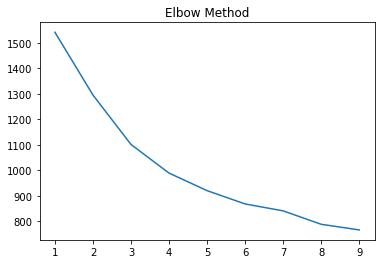

In [38]:
wcss=[]
for k in range(1,10):
    km=KMeans(n_clusters=k,init='k-means++',n_init=10,max_iter=300,random_state=0)
    km.fit(dfs)
    wcss.append(km.inertia_)
plot(range(1,10),wcss)
title('Elbow Method')      
xlable('k value')      
ylable('wcss')
show()      
      

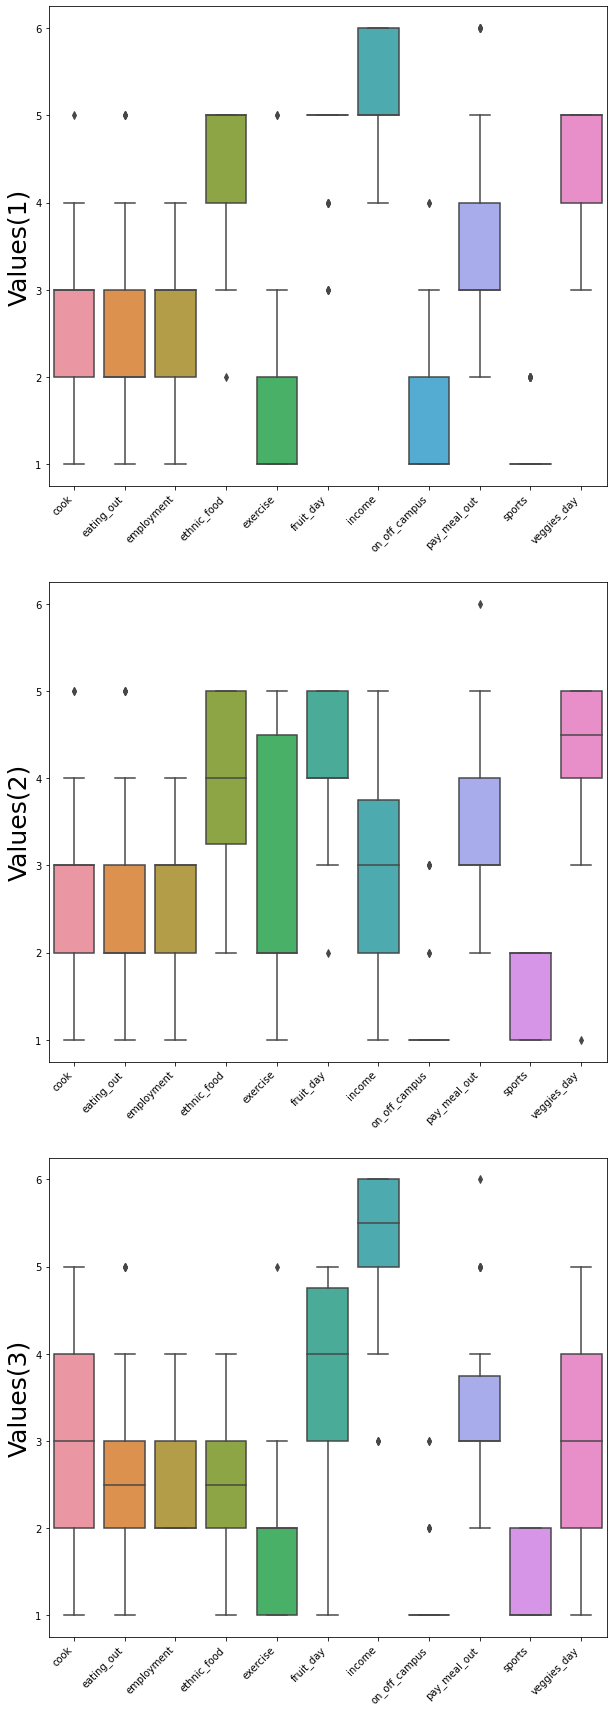

In [39]:
# observing the graph for diffnt k value
import matplotlib.pyplot as plt
fig,axes=plt.subplots(k_val,figsize=(10,30),sharey=True)
axes[0].set_ylabel('Values(1)', fontsize=25)
axes[1].set_ylabel('Values(2)', fontsize=25)
axes[2].set_ylabel('Values(3)', fontsize=25)
for k in range(k_val):
     plt.sca(axes[k])
     plt.xticks(rotation=45,ha='right')
     sb.boxplot(data = dfs[dfs['cluster'] == k].drop('cluster',1), ax=axes[k])
        
plt.show()


Now lets figure out which location are ideal for which kinds of student. Keeping in mind the fact that lower income students need a study supply of fresh fruits, while high income students need plenty of restaurents to choose from

In [40]:
df_eval=ndf[['lat','lng']]


In [42]:
rest_lst=[]
lat=list(ndf.lat)
lng=list(ndf.lng)
for lt,lg in zip(lat,lng):
    radius = 5000 
    latitude=lt
    longitude=lg
    url = 'https://api.foursquare.com/v3/places/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
    search_query = 'Restaurant' #Search for any food related locations
    headers = {
    "Accept": "application/json",
    "Authorization": "fsq3Tf4r7kfjrQyVYEUwhbKToHIo9/4kOElvTHyeCL+XXxk="
}
    result=requests.get(url,headers=headers).json()
    venues2=result['results'][:]
    # tranform venues into a dataframe
    nearby_venues2 = json_normalize(venues2)
    ndf2=df[column]
    rest_lst.append(ndf2['categories'].count())

In [43]:
df_eval['Restaurants']=rest_lst

<ipython-input-43-df203b94ecc8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eval['Restaurants']=rest_lst


In [44]:
fruit_lst=[]
lat=list(ndf.lat)
lng=list(ndf.lng)
for lt,lg in zip(lat,lng):
    radius = 5000 
    latitude=lt
    longitude=lg
    url = 'https://api.foursquare.com/v3/places/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
    search_query = 'Fruit' #Search for any food related locations
    headers = {
    "Accept": "application/json",
    "Authorization": "fsq3Tf4r7kfjrQyVYEUwhbKToHIo9/4kOElvTHyeCL+XXxk="
}
    result=requests.get(url,headers=headers).json()
    
    venues2=result['results'][:]
    # tranform venues into a dataframe
    nearby_venues2 = json_normalize(venues2)
    ndf2=df[column]
    fruit_lst.append(ndf2['categories'].count())

In [47]:
dept_lst=[]
lat=list(ndf.lat)
lng=list(ndf.lng)
for lt,lg in zip(lat,lng):
    radius = 5000 
    latitude=lt
    longitude=lg
    url = 'https://api.foursquare.com/v3/places/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
    search_query = 'department-store' #Search for any food related locations
    headers = {
    "Accept": "application/json",
    "Authorization": "fsq3Tf4r7kfjrQyVYEUwhbKToHIo9/4kOElvTHyeCL+XXxk="
}
    result=requests.get(url,headers=headers).json()
    
    venues2=result['results'][:]
    # tranform venues into a dataframe
    nearby_venues2 = json_normalize(venues2)
    ndf2=df[column]
    dept_lst.append(ndf2['categories'].count())

In [48]:
df_eval['department-store']=dept_lst

<ipython-input-48-e584b5136bea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eval['department-store']=dept_lst


In [49]:
df_eval['Fruits,Vegetables,Groceries']=fruit_lst

<ipython-input-49-ac6ad37b7601>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eval['Fruits,Vegetables,Groceries']=fruit_lst


In [50]:
k_val=3
kmeans=KMeans(n_clusters=k_val,random_state=0).fit(df_eval)
df_eval['cluster']=kmeans.labels_
df_eval['cluster']=df_eval['cluster'].apply(str)
df_eval.head(20)

<ipython-input-50-ee75c7bdfa09>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eval['cluster']=kmeans.labels_
<ipython-input-50-ee75c7bdfa09>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eval['cluster']=df_eval['cluster'].apply(str)


,lat,lng,Restaurants,department-store,"Fruits,Vegetables,Groceries",cluster
1,12.939126,77.583891,50,50,50,2
2,12.932805,77.582483,50,50,50,2
5,13.015547,77.763223,50,50,50,0
6,12.927501,77.577213,50,50,50,2
7,12.960884,77.648577,50,50,50,2
9,13.044796,77.572191,50,50,50,1
10,13.064718,77.591122,50,50,50,1
11,13.082576,77.623580,50,50,50,1
12,13.059735,77.609664,50,50,50,1
13,13.031193,77.570096,50,50,50,1


In [51]:
ltd=input(int())
long=input(int())
name=input("Enter college/university name: ")
map_plt=folium.Map(location=[ltd,long],zoom_start=12)
# instantiating a feature group for the incidents in the dataframe
locations = folium.map.FeatureGroup()
# setting the color scheme for the clusters
def color_producer(cluster):
    if cluster=='0':
        return 'green'
    elif cluster=='1':
        return 'orange'
    else:
        return 'red'
latitudes = list(df_eval.lat)
longitudes = list(df_eval.lng)
labels = list(df_eval.cluster)
names=list(ndf.name)
for lat, lng, label,names in zip(latitudes, longitudes, labels,names):
    folium.CircleMarker(
            [lat,lng],
            fill=True,
            fill_opacity=1,
            popup=folium.Popup(names, max_width = 300),
            radius=5,
            color=color_producer(label)
        ).add_to(map_plt)
    folium.Marker([ltd,long],popup=name,tooltip='click').add_to(map_plt)
# adding locations to map
map_plt.add_child(locations)

map_plt